# Neural Networks - Zalando MNIST Fashion dataset 

This dataset is adapted from the Fashion MNIST dataset from Zalando.
It consists of a series of images corresponding to items of clothing.
This is a four class classification problem with the following labels

    0: Sneaker
    1: Boot
    2: Shirt
    3: T-shirt

**Data :**   
X_train.npy: the training set as a numpy array of dimension (N, 28, 28). It corresponds to N images of 28*28 pixels in gray scale.  
X_train.npy: the corresponding training labels

### 1. Import the libraries and the data

In [1]:
#Libraries and Settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import cv2 # for image manipulations

from keras.models import Sequential
from keras import layers
from keras.layers import  BatchNormalization
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D

from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

Using TensorFlow backend.


In [2]:
# Import the data 
data = np.load('data/X_train.npy')
labels = np.load('data/y_train.npy')
validation = np.load('data/X_test.npy')

This is a  T-shirt


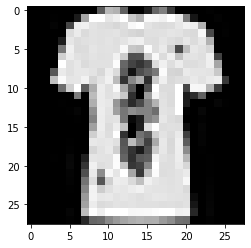

In [3]:
# Check and image and the corresponding label
item_lookup = {
    0: 'Sneaker',
    1: 'Boot',
    2: 'Shirt',
    3: 'T-shirt'}

im_index = 19999
plt.imshow(data[im_index], cmap="gray")
print( "This is a ", item_lookup[labels[im_index]])

### 2a. Reshape and Normalise the data 

In [4]:
print('Original shape: ',data.shape, labels.shape)

data = data.reshape(-1, 28, 28, 1)

# Normalize the data
data = data.astype('float32')/255

# This will add a column corresponding to categories
# and put 1 in the appropiate column for the each label, 0 in the other ones
labels = np_utils.to_categorical(labels)
print('After reshape and normalize: ',data.shape, labels.shape)

Original shape:  (20000, 28, 28) (20000,)
After reshape and normalize:  (20000, 28, 28, 1) (20000, 4)


### 2b. Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, random_state=42)
X_train.shape
y_train[0]

array([0., 1., 0., 0.], dtype=float32)

### 3. Model Build
#### 3a. Architecture from Andrew NG Deep Learning Course 

In [6]:
# Pad X and Y as its expecting shape 32x32
X_train_pad     = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test_pad     = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

input_shape = (32,32,1)
num_classes = 4

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [7]:
# Compile the model
model.compile(optimizer='adam', # this will use the default learning rate of 0.001
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=128,
          validation_data=(X_test_pad, y_test))

Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 310us/step - loss: 0.4180 - accuracy: 0.8503 - val_loss: 0.3251 - val_accuracy: 0.8652
Epoch 2/10
15000/15000 [==============================] - 4s 278us/step - loss: 0.2627 - accuracy: 0.8841 - val_loss: 0.2758 - val_accuracy: 0.8806
Epoch 3/10
15000/15000 [==============================] - 4s 273us/step - loss: 0.2407 - accuracy: 0.8940 - val_loss: 0.2283 - val_accuracy: 0.8988
Epoch 4/10
15000/15000 [==============================] - 5s 360us/step - loss: 0.2207 - accuracy: 0.9025 - val_loss: 0.2136 - val_accuracy: 0.9104
Epoch 5/10
15000/15000 [==============================] - 6s 416us/step - loss: 0.2088 - accuracy: 0.9097 - val_loss: 0.2174 - val_accuracy: 0.9024
Epoch 6/10
15000/15000 [==============================] - 6s 386us/step - loss: 0.2076 - accuracy: 0.9099 - val_loss: 0.2005 - val_accuracy: 0.9132
Epoch 7/10
15000/15000 [==============================] - 6s 39

In [9]:
# Score the model
train_score = model.evaluate(X_train_pad, y_train)
test_score = model.evaluate(X_test_pad, y_test)
print('Train loss: {:.5f}'.format(train_score[0]))
print('Train accuracy: {:.5f}'.format(train_score[1]))
print('Test loss: {:.5f}'.format(test_score[0]))
print('Test accuracy: {:.5f}'.format(test_score[1]))


5000/5000 [==============================] - 1s 155us/step
Train loss: 0.17778
Train accuracy: 0.92300
Test loss: 0.19863
Test accuracy: 0.91500


#### 3b. Another Architecture image size 28x28

In [10]:
input_shape = (28,28,1)
num_classes = 4

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
       

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [11]:
# Compile the model
model.compile(optimizer='adam', # this will use the default learning rate of 0.001
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
# Train the model
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=128,
          validation_data=(X_test, y_test))

Train on 15000 samples, validate on 5000 samples
Epoch 1/10
15000/15000 [==============================] - 18s 1ms/step - loss: 0.3620 - accuracy: 0.8539 - val_loss: 0.2379 - val_accuracy: 0.8994
Epoch 2/10
15000/15000 [==============================] - 22s 1ms/step - loss: 0.2326 - accuracy: 0.8987 - val_loss: 0.2220 - val_accuracy: 0.9034
Epoch 3/10
15000/15000 [==============================] - 20s 1ms/step - loss: 0.2121 - accuracy: 0.9081 - val_loss: 0.2466 - val_accuracy: 0.8954
Epoch 4/10
15000/15000 [==============================] - 18s 1ms/step - loss: 0.1953 - accuracy: 0.9167 - val_loss: 0.1822 - val_accuracy: 0.9236
Epoch 5/10
15000/15000 [==============================] - 22s 1ms/step - loss: 0.1811 - accuracy: 0.9232 - val_loss: 0.1743 - val_accuracy: 0.9254
Epoch 6/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.1681 - accuracy: 0.9305 - val_loss: 0.1649 - val_accuracy: 0.9316
Epoch 7/10
15000/15000 [==============================] - 19s 1ms/ste

In [13]:
# Score the model
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train loss: {:.5f}'.format(train_score[0]))
print('Train accuracy: {:.5f}'.format(train_score[1]))
print('Test loss: {:.5f}'.format(test_score[0]))
print('Test accuracy: {:.5f}'.format(test_score[1]))

5000/5000 [==============================] - 2s 410us/step
Train loss: 0.10624
Train accuracy: 0.95713
Test loss: 0.15939
Test accuracy: 0.93280


This second architecture is better but now lets be more systematic

---------------------------------------------------------------------------------------------------------------------------------------------------------

#  Systematic Approach inspired by kaggle
The below code is written with help from this notebook tutorial
https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist/notebook


### 0. Define some helper functions

In [14]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

def fit_model(model, names, epochs, nets):
    history = [0] * nets
    for j in range(nets):
        history[j] = model[j].fit(X_train,y_train, batch_size=80, epochs = epochs, 
            validation_data = (X_test,y_test),  callbacks=[annealer], verbose=0)
        print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
            names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) )) 
    return history

def plot_scores(history, nets, names): 
    plt.figure(figsize=(15,5))
    for i in range(nets):
        plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(names, loc='upper left')
    axes = plt.gca()
    axes.set_ylim([0.90,1])
    plt.show()
    # PLOT LOSS
    plt.figure(figsize=(15,5))
    for i in range(nets):
        plt.plot(history[i].history['val_loss'],linestyle=styles[i])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(names, loc='upper left')
    axes = plt.gca()
    axes.set_ylim([0.0,0.4])
    plt.show()
    return


## 1. How many convolution-subsambling pairs?
Let's see whether one, two, or three pairs is best. We are not doing four pairs since the image will be reduced too small before then.  
The input image is 28x28. After one pair, it's 14x14. After two, it's 7x7. After three it's 4x4 so it doesn't make sense to do a fourth convolution.

In [15]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets


for j in range(3):
    
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPooling2D())
    
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D())
        
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPooling2D(padding='same'))
        
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax')) 
    
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
 

In [16]:
# Fit the model
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
nets = 3  
   
history = fit_model(model, names, epochs, nets)

CNN (C-P)x1: Epochs=20, Train accuracy=0.99187, Validation accuracy=0.93580
CNN (C-P)x2: Epochs=20, Train accuracy=0.99313, Validation accuracy=0.93920
CNN (C-P)x3: Epochs=20, Train accuracy=0.99807, Validation accuracy=0.94080


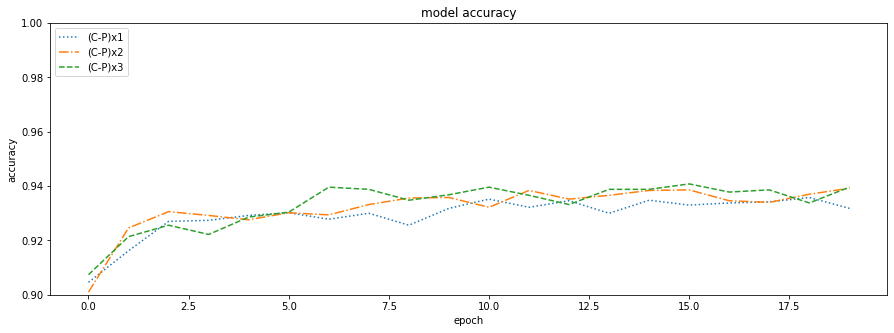

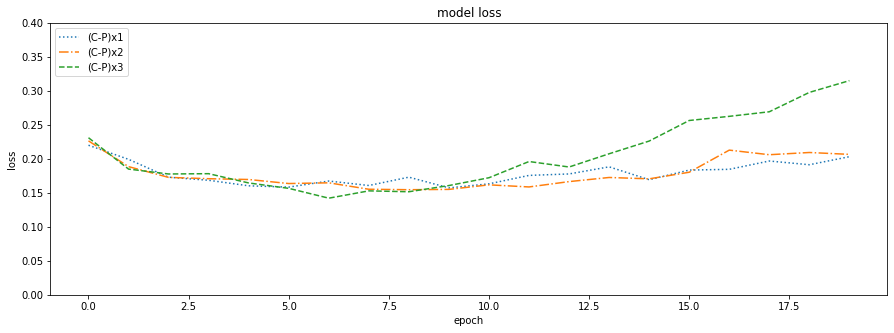

In [17]:
# Plot the accuracies and loss
plot_scores(history, nets, names) 

#### Summary - How many convolution-subsambling pairs

Performance is quite similar however looking at the loss 3 looks like they are overfitting so here we will choose 2 layers

## 2. How many feature maps?
In the previous experiement, we decided that two pairs is sufficient. How many feature maps should we include? For example, we could do

784 - [8C5-P2] -  [16C5-P2] - 256 - 4  
784 - [16C5-P2] - [32C5-P2] - 256 - 4  
784 - [24C5-P2] - [48C5-P2] - 256 - 4  
784 - [32C5-P2] - [64C5-P2] - 256 - 4  
784 - [40C5-P2] - [80C5-P2] - 256 - 4  
784 - [48C5-P2] - [96C5-P2] - 256 - 4  
784 - [56C5-P2] - [112C5-P2] - 256 - 4  
784 - [64C5-P2] - [128C5-P2] - 256 - 4

In [18]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets
for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
# TRAIN NETWORKS
names = ["8 maps","16 maps","24 maps","32 maps","40 maps","48 maps","56 maps","64 maps"]
epochs = 20
history = fit_model(model, names, epochs, nets)

CNN 8 maps: Epochs=20, Train accuracy=0.94893, Validation accuracy=0.93040
CNN 16 maps: Epochs=20, Train accuracy=0.97133, Validation accuracy=0.93320
CNN 24 maps: Epochs=20, Train accuracy=0.98413, Validation accuracy=0.93780
CNN 32 maps: Epochs=20, Train accuracy=0.99080, Validation accuracy=0.93800
CNN 40 maps: Epochs=20, Train accuracy=0.99693, Validation accuracy=0.93840
CNN 48 maps: Epochs=20, Train accuracy=0.99533, Validation accuracy=0.93940
CNN 56 maps: Epochs=20, Train accuracy=0.99707, Validation accuracy=0.93760
CNN 64 maps: Epochs=20, Train accuracy=0.99893, Validation accuracy=0.93880


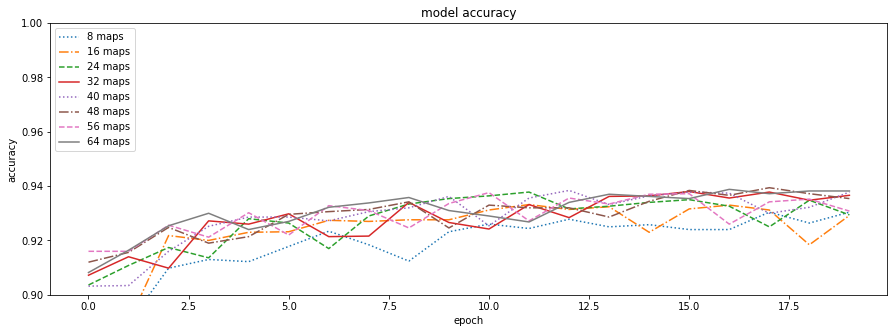

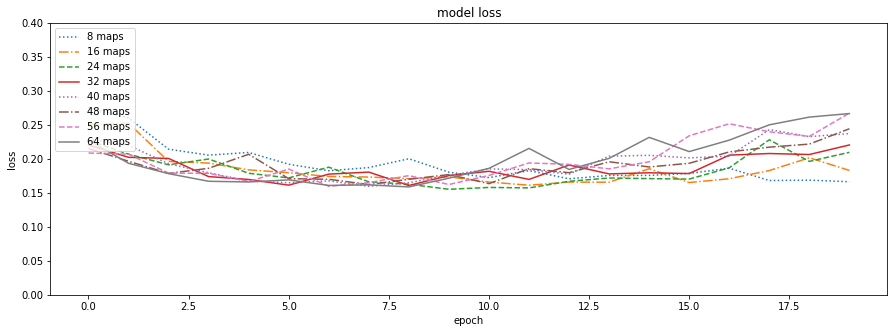

In [20]:
# PLOT ACCURACIES
# Plot the accuracies and loss
plot_scores(history,nets, names) 

#### Summary - How many Feature Maps

48 has the highest max accuracy so we will try with this

## 3. How large a dense layer?
In our previous experiment, we decided on  48 and 96 maps in our convolutional layers. How many dense units should we use? For example we could use

784 - [48C5-P2] - [96C5-P2] - 0 - 10  
784 - [48C5-P2] - [96C5-P2] - 32 - 10  
784 - [48C5-P2] - [96C5-P2] - 64 - 10  
784 - [48C5-P2] - [96C5-P2] - 128 -10  
784 - [48C5-P2] - [96C5-P2] - 256 - 10  
784 - [48C5-P2] - [96C5-P2] - 512 -10  
784 - [48C5-P2] - [96C5-P2] - 1024 - 10  
784 - [48C5-P2] - [96C5-P2] - 2048 - 10  

In [21]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D())
    model[j].add(Conv2D(96,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(4, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
# TRAIN NETWORKS
names = names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
history = fit_model(model, names, epochs, nets)

CNN 0N: Epochs=20, Train accuracy=0.97520, Validation accuracy=0.93520
CNN 32N: Epochs=20, Train accuracy=0.98587, Validation accuracy=0.93800
CNN 64N: Epochs=20, Train accuracy=0.99147, Validation accuracy=0.93740
CNN 128N: Epochs=20, Train accuracy=0.99440, Validation accuracy=0.93860
CNN 256N: Epochs=20, Train accuracy=0.99500, Validation accuracy=0.93420
CNN 512N: Epochs=20, Train accuracy=0.99627, Validation accuracy=0.93800
CNN 1024N: Epochs=20, Train accuracy=0.99880, Validation accuracy=0.93940
CNN 2048N: Epochs=20, Train accuracy=0.99727, Validation accuracy=0.93820


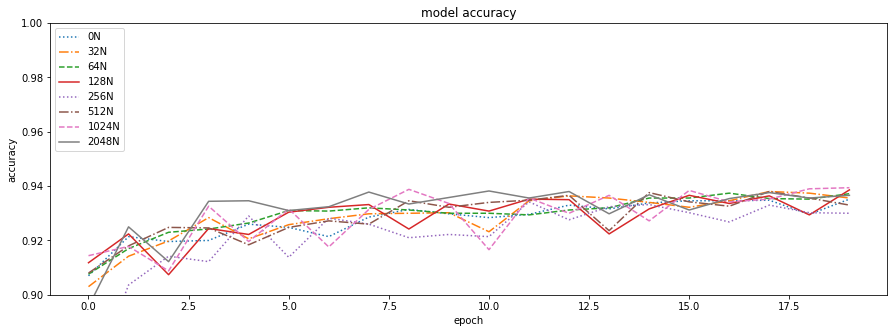

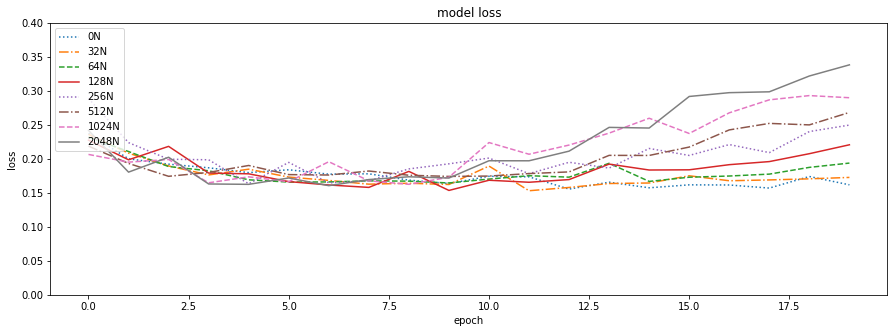

In [23]:
# Plot the accuracies and loss
plot_scores(history,nets, names) 

#### Summary - How many large dense layer?
128 seems to offer the best compromise between accuracy, and validation loss

## 4. How much dropout?
Dropout will prevent our network from overfitting thus helping our network generalize better. How much dropout should we add after each layer?

0%, 10%, 20%, 30%, 40%, 50%, 60%, or 70%

In [24]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(96,kernel_size=5,activation='relu'))
    model[j].add(MaxPooling2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(4, activation='softmax'))
    
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
# TRAIN NETWORKS
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 20
history = fit_model(model, names, epochs, nets)

CNN D=0: Epochs=20, Train accuracy=0.99320, Validation accuracy=0.93920
CNN D=0.1: Epochs=20, Train accuracy=0.97313, Validation accuracy=0.94060
CNN D=0.2: Epochs=20, Train accuracy=0.95920, Validation accuracy=0.94140
CNN D=0.3: Epochs=20, Train accuracy=0.94940, Validation accuracy=0.94040
CNN D=0.4: Epochs=20, Train accuracy=0.93573, Validation accuracy=0.93760
CNN D=0.5: Epochs=20, Train accuracy=0.92540, Validation accuracy=0.93360
CNN D=0.6: Epochs=20, Train accuracy=0.91587, Validation accuracy=0.93000
CNN D=0.7: Epochs=20, Train accuracy=0.90220, Validation accuracy=0.92260


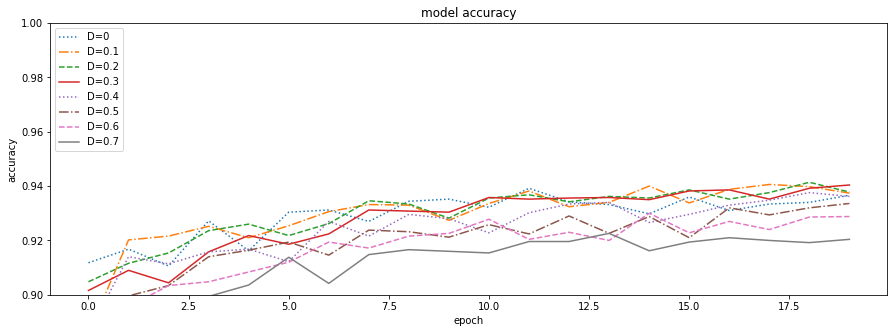

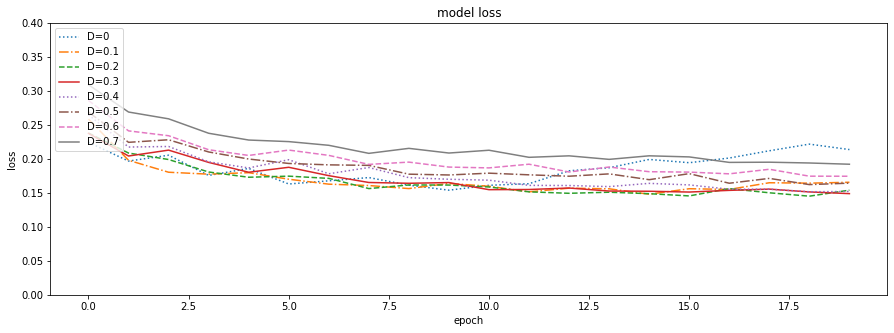

In [26]:
plot_scores(history, nets, names)

#### Summary - How many large dense layer?Here
we will use 30 % drop out

## 5. Advanced features
We will try the follwoing changes

* Replace  5x5 by using two consecutive 3x3 layers to be more nonlinear (replace '48C5' with '48C3-48C3')   
* Instead of using a max pooling layer, use a convolution layer with strides=2  (replace 'P2' with '48C5S2')
* Try batch normalization 
* Try data augmentation

In [27]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

# Basic
j=0
model[j] = Sequential()
model[j].add(Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.3))
model[j].add(Conv2D(96,kernel_size=5,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.3))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Dense(4, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#replace '32C5' with '32C3-32C3'
j=1
model[j] = Sequential()
model[j].add(Conv2D(48,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(48,kernel_size=3,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.3))
model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.3))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Dense(4, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#replace 'P2' with '32C5S2'
j=2
model[j] = Sequential()
model[j].add(Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(48,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Conv2D(96,kernel_size=5,activation='relu'))
model[j].add(Conv2D(96,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Dense(4, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# add batch normalization
j=3
model[j] = Sequential()

model[j].add(Conv2D(48,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(48,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(48,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())

model[j].add(Dropout(0.3))

model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(96,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())

model[j].add(Dropout(0.3))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Dense(4, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


j=4
model[j] = Sequential()

model[j].add(Conv2D(48,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(48,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(48,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.3))

model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(96,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.3))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.3))
model[j].add(Dense(4, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
###### history = [0] * nets
names = ["basic","48C3-48C3","48C5S2","both+BN","both+BN+DA"]
epochs = 20

#train the first four models
history = fit_model(model, names, epochs, nets -1)

# Create more data for data augmnetation
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1) 

#train the fifith model
j =4

history_temp = model[j].fit_generator(datagen.flow(X_train,y_train, batch_size=64), 
    epochs = epochs, steps_per_epoch = X_train.shape[0]//64,
    validation_data = (X_test,y_test), callbacks=[annealer], verbose=0)


print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[j],epochs,max(history_temp.history['accuracy']),max(history_temp.history['val_accuracy']) )) 

CNN basic: Epochs=20, Train accuracy=0.96933, Validation accuracy=0.94440
CNN 48C3-48C3: Epochs=20, Train accuracy=0.98667, Validation accuracy=0.94520
CNN 48C5S2: Epochs=20, Train accuracy=0.99433, Validation accuracy=0.94000
CNN both+BN: Epochs=20, Train accuracy=0.99627, Validation accuracy=0.94120
CNN both+BN+DA: Epochs=20, Train accuracy=0.94376, Validation accuracy=0.94580


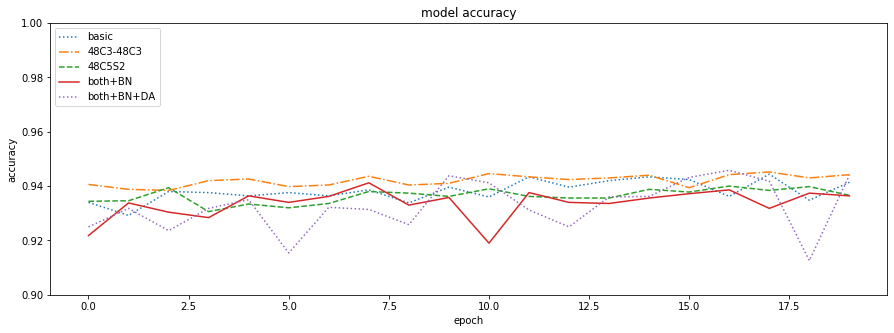

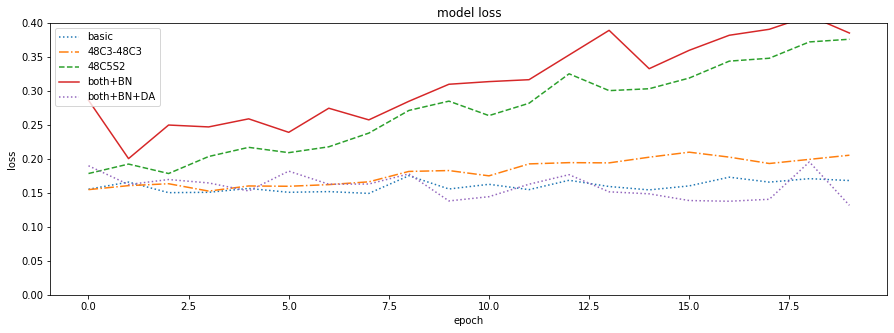

In [30]:
history.append(history_temp)
plot_scores(history, nets, names) 

Summary = The best performing model was 48C3 48C3 with 0.3 Drop out

In [ ]:
model[j] = Sequential()
model[j].add(Conv2D(48,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(48,kernel_size=3,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.3))
model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(Conv2D(96,kernel_size=3,activation='relu'))
model[j].add(MaxPooling2D())
model[j].add(Dropout(0.3))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.3))
model[j].add(Dense(4, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])